# "Яндекс Музыка" - оценка гипотез о музыкальных предпочтениях в Москве и Санкт-Петербурге

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс Музыки необходимо сравнить поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**
Исследование пройдёт в три этапа:
 1. Обзор данных
 2. Предобработка данных
 3. Проверка гипотез

 **Столбцы данных**
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.




## Обзор данных



In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# чтение файла с данными и сохранение в переменную df
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_music_project.csv')

In [ ]:
# получение первых 10 строк таблицы df
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [ ]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных


### Стиль заголовков

In [ ]:
# перечень названий столбцов таблицы df
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [ ]:
# переименование столбцов
df = df.rename(columns = {'  userID':'user_id', 'Track':'track', '  City  ':'city', 'Day':'day'})


In [ ]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений


In [ ]:
# подсчёт пропусков
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для итоговой работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями;
* оценить, насколько они повредят расчётам. 

In [ ]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = df[['track', 'artist', 'genre']]
for column in columns_to_replace:
    df[column].fillna('unknown', inplace=True)

In [ ]:
# подсчёт пропусков
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты

In [ ]:
# подсчёт явных дубликатов
df.duplicated().sum()

3826

In [ ]:
# удаление явных дубликатов
df=df.drop_duplicates().reset_index(drop=True)

In [ ]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [ ]:
# Просмотр уникальных названий жанров для исправления неявных дубликатов
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [ ]:
# устранение неявных дубликатов
df ['genre'] = df ['genre'].replace(['hip', 'hop', 'hip-hop'],'hiphop')

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Были исправили заголовки, чтобы упростить работу с таблицей. А также удалены дубликаты, без которых исследование станет более точным.

Пропущенные значения заменены на `'unknown'`. Далее необходимо убедиться повлияют ли пропуски в колонке `genre` на итог исследования.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого необходимо:

* Разделить пользователей Москвы и Санкт-Петербурга
* Сравнить, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


In [ ]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['track'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.



In [ ]:
# Подсчёт прослушиваний в каждый из трёх дней

df.groupby('day')['track'].count()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

In [ ]:
# создание функции для подсчета числа прослушиваний треков за определенный день (day) в определенном городе (city)
def number_tracks(day, city):
    track_list = df[(df['day'] == day) & (df['city'] == city)]
    
    track_list_count=track_list['user_id'].count()
    return track_list_count
# создание пустого dataframe для добавления результатов функции
number_tracks_df = pd.DataFrame(columns=df.day.unique(), index = df.city.unique())

In [ ]:
print ('Количество прослушиваний:')
for city in df.city.unique():
  for day in df.day.unique():
    print(' в городе', city, 'в', day, '=', number_tracks(day, city))
    number_tracks_df.loc[city][day]=number_tracks(day, city)

print()
print('Города:')
print(' Moscow - Москва')
print(' Saint-Petersburg - Санкт-Петербург')
print('Дни недели:')
print(' Monday - Понедельник')
print(' Wednesday - Среда')
print(' Friday - Пятница')
print()
print('Итоговая таблица с данными')
number_tracks_df = number_tracks_df[[ 'Monday', 'Wednesday', 'Friday']]
display(number_tracks_df)

Количество прослушиваний:
 в городе Saint-Petersburg в Wednesday = 7003
 в городе Saint-Petersburg в Friday = 5895
 в городе Saint-Petersburg в Monday = 5614
 в городе Moscow в Wednesday = 11056
 в городе Moscow в Friday = 15945
 в городе Moscow в Monday = 15740

Города:
 Moscow - Москва
 Saint-Petersburg - Санкт-Петербург
Дни недели:
 Monday - Понедельник
 Wednesday - Среда
 Friday - Пятница

Итоговая таблица с данными


,Monday,Wednesday,Friday
Saint-Petersburg,5614,7003,5895
Moscow,15740,11056,15945


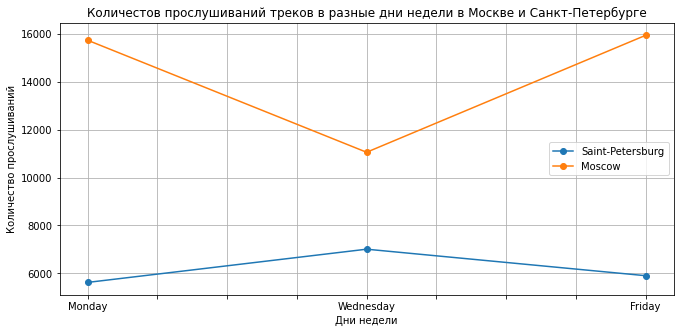

In [ ]:
# создание графика для визуализации результатов
for city in df.city.unique():
        number_tracks_df.loc[city].plot(
        title='Количестов прослушиваний треков в разные дни недели в Москве и Санкт-Петербурге', 
        grid=True, 
        legend=True,
        marker='o',
        figsize=(11, 5)
    ).set(xlabel='Дни недели', ylabel = 'Количество прослушиваний')
plt.show()

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [ ]:
# разделение данных df по городам
moscow_general = df[df['city']=='Moscow']
spb_general = df[df['city']=='Saint-Petersburg']

In [ ]:
# создание функции, которая возвращает топ-10 жанров тех треков, которые прослушивали в определенный день
# в промежутке между двумя отметками времени
def genre_weekday (df, day, time1, time2):
    genre_df=df[(df['day']==day)&(df['time']>time1)&(df['time']<time2)]
    genre_df_count=genre_df.groupby('genre')['genre'].count().sort_values(ascending=False)
    return genre_df_count[:10]

In [ ]:
# сравнение результатов функции genre_weekday() для Москвы и Санкт-Петербурга 
# в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00)
print('Топ-10 жанров и количество прослушиваний в')
print()
print('Москве в Понедельник в период с 07:00 до 11:00')
print(genre_weekday(moscow_general, 'Monday', '07:00', '11:00'))
print()
print('Санкт-Петербурге в Понедельник в период с 07:00 до 11:00')
print(genre_weekday(spb_general, 'Monday', '07:00', '11:00'))
print()
print('Москве в Пятницу в период с 17:00 до 23:00')
print(genre_weekday(moscow_general,'Friday','17:00','23:00'))
print()
print('Санкт-Петербурге в Пятницу в период с 17:00 до 23:00')
print(genre_weekday(spb_general,'Friday','17:00','23:00'))


Топ-10 жанров и количество прослушиваний в

Москве в Понедельник в период с 07:00 до 11:00
genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre, dtype: int64

Санкт-Петербурге в Понедельник в период с 07:00 до 11:00
genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64

Москве в Пятницу в период с 17:00 до 23:00
genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64

Санкт-Петербурге в Пятницу в период с 17:00 до 23:00
genre
pop            256
electronic     216
rock           216
dance          210
hipho

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [ ]:
# топ-10 жанров, прослушиваемых в Москве за 3 дня исследования
moscow_genres=moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)
print('Топ-10 жанров, прослушиваемых в Москве за 3 дня исследования:')
print(moscow_genres[:10])
print()
# топ-10 жанров, прослушиваемых в Санкт-Петербурге за 3 дня исследования
spb_genres=spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)
print('Топ-10 жанров, прослушиваемых в Санкт-Петербурге за 3 дня исследования:')
print(spb_genres[:10])

Топ-10 жанров, прослушиваемых в Москве за 3 дня исследования:
genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

Топ-10 жанров, прослушиваемых в Санкт-Петербурге за 3 дня исследования:
genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64


**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Были проверены три гипотезы и установлено, что:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города. Проверки статистических гипотез показали, насколько они достоверны, исходя из имеющихся данных. 
